In [2]:
#esse notebook contém os scripts para criar novos datasets;
import pandas as pd
import numpy as np
import time
import datetime
import re

years = [2015, 2016, 2017]
datapath = '../data/bicicletar/clean_data_'
files = [pd.read_pickle('%s%d.pkl' % (datapath,year)) for year in years]
all_data = pd.concat(files,ignore_index=True)
all_data['ano_nascimento'] = all_data['ano_nascimento'].astype('int64')

/home/renan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  # This is added back by InteractiveShellApp.init_path()


In [136]:
# viagens_bicicletar = all_data[all_data['tipo_viagem'] == 0]
viagens_bicicletar['tempo_viagem'] = (viagens_bicicletar['datetime_devolucao'] - viagens_bicicletar['datetime_retirada']) / np.timedelta64(1, 'm')
# viagens_bicicletar['dia_retirada'] = viagens_bicicletar.apply(lambda x: x['datetime_retirada'].date(), axis=1)
# viagens_bicicletar['dia_devolucao'] = viagens_bicicletar.apply(lambda x: x['datetime_devolucao'].date(), axis=1)

/home/omadson/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [36]:
viagens_bicicletar['dia_retirada'] = viagens_bicicletar['dia_retirada'].astype('str')
viagens_bicicletar['dia_devolucao'] = viagens_bicicletar['dia_devolucao'].astype('str')

df_ = pd.read_csv('../data/bicicletar/graph_datasets/cc.csv', index_col='dia')

/home/omadson/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/omadson/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [171]:
# from numpy import histogram
# a = viagens_bicicletar[(viagens_bicicletar['tempo_viagem'] < 3) &(viagens_bicicletar['tipo_usuario']=='Cartão Transportes')&(viagens_bicicletar['sexo']=='F')]['tempo_viagem']
# h_a = histogram(a, bins=180)

# from matplotlib import pyplot as plt
# plt.plot(h_a[1][:-1], h_a[0]/h_a[0].sum())


# viagens_bicicletar[(viagens_bicicletar['tempo_viagem'] < 3) &(viagens_bicicletar['tipo_usuario']=='Cartão Transportes')&(viagens_bicicletar['sexo']=='F')]['tempo_viagem_round'].round(decimals=1)

# viagens_bicicletar['tempo_viagem_round'] = viagens_bicicletar['tempo_viagem'].round()
# viagens_bicicletar[viagens_bicicletar['tempo_viagem_round'] < 180]['tempo_viagem_round'].plot.hist(bins=180)

# vb = viagens_bicicletar
dd = []
for sexo in ['M', 'F', 'O']:
    aa = pd.DataFrame(vb[(vb['tempo_viagem_round'] < 180)&(vb['sexo'] == sexo)]['tempo_viagem_round'].value_counts())
    aa = aa.rename(columns={'tempo_viagem_round': sexo})
    dd.append(aa)
tmp_ride_by_sex = pd.concat(dd,axis=1)
tmp_ride_by_sex = tmp_ride_by_sex.fillna(0)
tmp_ride_by_sex.index.name = 'minutos'
tmp_ride_by_sex.to_csv('../data/bicicletar/graph_datasets/time_ride_by_sex.csv')

In [179]:


dd = []
for wd in [0,1]:
    wd_list = list(df_[df_['workingday'] == wd].index)
    aa = pd.DataFrame(vb[(vb['tempo_viagem_round'] < 180)&(vb['dia_retirada'].isin(wd_list))]['tempo_viagem_round'].value_counts()) 
    aa['tempo_viagem_round'] = aa['tempo_viagem_round'] / len(wd_list)
    aa = aa.rename(columns={'tempo_viagem_round': wd})
    dd.append(aa)
tmp_ride_by_wd = pd.concat(dd,axis=1)
tmp_ride_by_wd = tmp_ride_by_wd.fillna(0)
tmp_ride_by_wd.index.name = 'minutos'
tmp_ride_by_wd = tmp_ride_by_wd.rename(columns={0: 'dia não útil', 1: 'dia útil'})

tmp_ride_by_wd.to_csv('../data/bicicletar/graph_datasets/time_ride_by_wd.csv')

In [181]:
all_data

,ano_nascimento,cidade,datetime_cadastro,datetime_devolucao,datetime_retirada,estacao_devolucao,estacao_retirada,id_bicicleta,id_usuario,pais,sexo,tipo_usuario,tipo_viagem,uf
0,1989,NaN,2014-12-15 22:11:59,2014-12-16 06:33:31.307,2014-12-16 06:12:43.517,14,4,10561,1644398,BR,M,URA/APP,0,CE
1,1985,NaN,2014-12-15 22:45:39,2014-12-16 07:08:10.530,2014-12-16 06:58:04.743,1,1,10460,1644548,BR,M,URA/APP,0,CE
2,1995,NaN,2014-12-16 06:19:17,2014-12-16 07:34:38.240,2014-12-16 06:58:32.983,15,15,10464,1644977,BR,F,URA/APP,0,CE
3,1987,fortaleza,2014-12-14 14:59:47,2014-12-16 07:52:22.063,2014-12-16 07:01:22.367,14,1,10637,1639126,BR,M,URA/APP,0,CE
4,1980,NaN,2014-12-16 05:18:45,2014-12-16 07:10:07.580,2014-12-16 07:07:44.813,8,8,10576,1644927,BR,M,URA/APP,3,CE
5,1980,NaN,2014-12-16 05:18:45,2014-12-16 07:26:16.473,2014-12-16 07:11:10.390,8,8,10556,1644927,BR,M,URA/APP,0,CE
6,1989,NaN,2014-12-15 22:11:59,2014-12-16 07:49:46.060,2014-12-16 07:30:44.947,4,14,10624,1644398,BR,M,URA/APP,0,CE
7,1984,NaN,2014-12-14 22:45:57,2014-12-16 07:53:49.850,2014-12-16 07:31:40.237,15,15,10629,1640615,BR,M,URA/APP,0,CE
8,1989,Fortaleza,2012-12-04 06:17:21,2014-12-16 08:14:43.000,2014-12-16 07:32:13.617,15,15,10583,400675,BR,M,URA/APP,0,CE
9,1984,NaN,2014-12-15 19:50:17,2014-12-16 08:12:59.287,2014-12-16 07:34:20.513,1,1,10482,1643796,BR,F,URA/APP,0,SP


In [90]:
%matplotlib inline
working_days = list(df_[df_['workingday'] == 1].index)
viagens_bicicletar[(viagens_bicicletar['tempo_viagem'] < 3) &(viagens_bicicletar['tipo_usuario']=='Cartão Transportes')]['tempo_viagem']


# .plot.hist(bins=180, figsize=(14, 4))



# ['tempo_viagem'].plot.hist(bins=120)

10         0.265756
22         0.576252
23         0.564156
25         0.375779
35         0.761297
36         0.749567
39         0.491423
46         0.385980
60         2.279572
64         0.100644
70         0.318342
75         0.494457
80         0.344111
82         0.267083
83         0.268478
85         0.252729
102        0.165358
107        0.306621
111        0.079834
112        0.129953
117        0.112924
118        0.183214
119        0.207028
121        0.250275
122        0.123512
124        0.737119
128        1.977971
130        0.147144
134        0.145272
136        0.183435
             ...   
1836078    1.016667
1836079    0.366667
1836080    0.066667
1836081    0.500000
1836082    0.483333
1836084    0.683333
1836085    0.666667
1836089    0.533333
1836090    0.183333
1836091    0.366667
1836092    0.350000
1836094    0.050000
1836095    0.100000
1836096    0.083333
1836098    0.183333
1836099    0.716667
1836100    0.233333
1836103    0.100000
1836104    0.166667


In [75]:
viagens_bicicletar['tipo_usuario'].unique()

array(['URA/APP', 'Cartão Transportes'], dtype=object)

In [17]:
#cria dataset com o número de viagens (de cada categoria) por ano (2014,2015,2016,2017)

def num_of_rides_per_year():
    date15 = datetime.datetime(2015, 1, 1)
    data2014 = all_data[all_data['datetime_retirada'] < date15]

    date16 = datetime.datetime(2016, 1, 1)
    data2015 = all_data[(date15 <= all_data['datetime_retirada']) & (all_data['datetime_retirada'] < date16)]

    date17 = datetime.datetime(2017, 1, 1)
    data2016 = all_data[(date16 <= all_data['datetime_retirada']) & (all_data['datetime_retirada'] < date17)]
    data2017 = all_data[date17 <= all_data['datetime_retirada']]

    data2014.shape[0],data2015.shape[0],data2016.shape[0],data2017.shape[0]

    #dataset = pd.DataFrame(columns=['bicicletar','minibicicletar','tecnica','menos_4_min','mais_um_dia','minibicicletar_bug'])
    dataset = []
    for data in[data2014,data2015,data2016,data2017]:
        dataset.append(data['tipo_viagem'].value_counts().to_dict())
    
    dataset = pd.DataFrame(dataset)
    dataset = dataset.rename(index=str, columns={0: 'bicicletar',
                                                 1: 'minibicicletar',
                                                 2: 'tecnica',
                                                 3: 'viagens curtas',
                                                 4: 'viagens longas',
                                                 5: 'minibicicletar com problema'})
    dataset = dataset.fillna(0)
    dataset['ano'] = [2014,2015,2016,2017]
    dataset = dataset.set_index('ano')
    dataset.to_csv('../data/bicicletar/graph_datasets/rides_per_years.csv')
        

In [6]:
#cria dataset com o número de cadastros (homem, mulher e outro) efetuados por ano (2014,2015,2016,2017)

def num_of_signup_per_year():
    dataset = all_data
    dataset['ano_cadastro'] = all_data.apply(lambda x: x['datetime_cadastro'].year, axis=1)
    dataM = dataset[dataset['sexo']=='M'].groupby(by='ano_cadastro', as_index=True).agg({'id_usuario': pd.Series.nunique})
    dataF = dataset[dataset['sexo']=='F'].groupby(by='ano_cadastro', as_index=True).agg({'id_usuario': pd.Series.nunique})
    dataO = dataset[dataset['sexo']=='O'].groupby(by='ano_cadastro', as_index=True).agg({'id_usuario': pd.Series.nunique})

    dataM = dataM.rename(columns={'id_usuario': 'M'})
    dataF = dataF.rename(columns={'id_usuario': 'F'})
    dataO = dataO.rename(columns={'id_usuario': 'O'})
    
    finalDS = pd.concat([dataM,dataF,dataO],axis=1)
    finalDS = finalDS.fillna(0);               
    
    finalDS.to_csv('../data/bicicletar/graph_datasets/signup_per_year.csv')
    return finalDS        

In [35]:
#cria dataset com o número de cadastros (homem, mulher e outro) efetuados por ano (2014,2015,2016,2017)

def num_of_rides_per_day():
    # bicicletar rides 
    dataset = all_data[all_data['tipo_viagem'] == 0]
    dataset['dia_corrida'] = dataset.apply(lambda x: x['datetime_retirada'].date(), axis=1)
    rides_per_day = pd.DataFrame(dataset['dia_corrida'].value_counts().sort_index())
    
    
    for ride_type in [1,2,3,4]:
        dataset = all_data[all_data['tipo_viagem'] == ride_type]
        dataset['dia_corrida'] = dataset.apply(lambda x: x['datetime_retirada'].date(), axis=1)
        a = pd.DataFrame(dataset['dia_corrida'].value_counts())
        a = a.rename(columns={'dia_corrida': ride_type})
        rides_per_day = pd.concat([rides_per_day,a], axis=1)
    
    rides_per_day = rides_per_day.fillna(0)
    
    rides_per_day = rides_per_day.rename(index=str, columns={'dia_corrida': 'bicicletar',
                                                             1: 'minibicicletar',
                                                             2: 'tecnica',
                                                             3: 'viagens curtas',
                                                             4: 'viagens longas',
                                                             5: 'minibicicletar com problema'})
    
    rides_per_day.index.name = 'dia'
    rides_per_day.to_csv('../data/bicicletar/graph_datasets/rides_per_day.csv')
    return rides_per_day    

In [136]:
import datetime
# def num_of_rides_per_day_per_station():
    
dataset_num_of_rides = pd.read_csv('../data/bicicletar/graph_datasets/rides_per_day.csv')    
stations = pd.read_csv('../data/bicicletar/stations_with_new_neighborhood.csv') #read stations dataset
stations = stations.drop([80,81,82,83,84,85]) #remove minibicicletar stations    
id_stations_date = {}  #create dict to store 1st ride of each station

#for each id of all stations
for i in stations['id']:           
    tmp_dataset = all_data[all_data['estacao_retirada'] == i]             #select the station         
    tmp_dataset.sort_values(by=['datetime_retirada'],inplace=True)        #sort the date rides         
    id_stations_date[i] = tmp_dataset[:1]['datetime_retirada'].values[0]  #get the first ride

stations_date = pd.DataFrame.from_dict(id_stations_date,orient='index',columns=['1st_viagem'])  #transform the dict to a dataFrame     
dataset_num_of_rides['dia'] = dataset_num_of_rides['dia'].astype('datetime64')     

hora = datetime.timedelta(minutes=59, hours=23)

# dataset['dia_corrida'] = dataset.apply(lambda x: x['datetime_retirada'].date(), axis=1)
# dataset['dia_corrida'] = dataset.apply(lambda x: x['datetime_retirada'].date(), axis=1)

num_of_stations = pd.DataFrame(columns=['num_of_stations'])    
# df.append(df2, ignore_index=True)
for index,row in dataset_num_of_rides.iterrows():
    row['dia'] = row['dia'] + hora    
    aux = (row['dia'] >= stations_date['1st_viagem']).value_counts()
    num_of_stations = pd.concat([num_of_stations,pd.DataFrame([aux.loc[True]])],axis=0)
#     print(row['dia'])    
#     print(aux.loc[True])   
    
#     print(row['dia'],aux)
        
#         num_of_stations = pd.concat([num_of_stations,pd.DataFrame(aux)],axis=0)
#     return aux
#     print(num_of_stations)

num_of_stations.drop(['num_of_stations'], axis=1,inplace=True)
num_of_stations.columns=['num_of_stations']
num_of_stations = num_of_stations.reset_index(drop=True)
print(dataset_num_of_rides.shape[0],num_of_stations.shape[0])
dataset_num_of_rides['num_of_stations'] = num_of_stations['num_of_stations']
print(dataset_num_of_rides)
dataset_num_of_rides.to_csv('../data/bicicletar/graph_datasets/avg_rides_per_stations.csv')

# aa = num_of_rides_per_day_per_station()

/home/renan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/home/renan/anaconda3/lib/python3.6/site-packages/pandas/core/indexes/api.py:107: RuntimeWarning: '<' not supported between instances of 'int' and 'str', sort order is undefined for incomparable objects
  result = result.union(other)


1095 1095
            dia  bicicletar  minibicicletar  tecnica  viagens curtas  \
0    2014-12-16         354             0.0      0.0              22   
1    2014-12-17         479             0.0      0.0              15   
2    2014-12-18         488             0.0      0.0              28   
3    2014-12-19         502             0.0      0.0              21   
4    2014-12-20         521             0.0      0.0              22   
5    2014-12-21         935             0.0      0.0              38   
6    2014-12-22         660             0.0      0.0              24   
7    2014-12-23         631             0.0      0.0              19   
8    2014-12-24         339             0.0      0.0              10   
9    2014-12-25         631             0.0      0.0              25   
10   2014-12-26         784             0.0      0.0              27   
11   2014-12-27         751             0.0      0.0              32   
12   2014-12-28        1050             0.0      0.0  

In [112]:
aa.loc[False]

KeyError: 'the label [False] is not in the [index]'

In [ ]:
def num_of_users_birth_per_year(type):
    
    filter_data = all_data[(all_data['tipo_viagem'] == 0) & \
                           (all_data['ano_nascimento'] >= 1940) & \
                           (all_data['ano_nascimento'] <= 2000)]  
    
    m_data = filter_data[filter_data['sexo'] == 'M']
    f_data = filter_data[filter_data['sexo'] == 'F']
    o_data = filter_data[filter_data['sexo'] == 'O']
    
    m_perYear = m_data.groupby(by='ano_nascimento', as_index=True).agg({'id_usuario': pd.Series.nunique})
    f_perYear = f_data.groupby(by='ano_nascimento', as_index=True).agg({'id_usuario': pd.Series.nunique})
    o_perYear = o_data.groupby(by='ano_nascimento', as_index=True).agg({'id_usuario': pd.Series.nunique})

    
    m_perYear = m_perYear.rename(index=str, columns={'id_usuario': 'M'})
    f_perYear = f_perYear.rename(index=str, columns={'id_usuario': 'F'})
    o_perYear = o_perYear.rename(index=str, columns={'id_usuario': 'O'})
    
    m_perYear.plot.bar(figsize=(19,5))    
    f_perYear.plot.bar(figsize=(19,5))    
    o_perYear.plot.bar(figsize=(19,5))   
            
    final_dataset = pd.concat([m_perYear,f_perYear,o_perYear], axis=1)
    final_dataset.index.rename('year',inplace=True)
    final_dataset.fillna(0,inplace=True)

    if (type == 'perc'):
        ((final_dataset/final_dataset.sum().sum())*100).to_csv('../data/bicicletar/graph_datasets/perc_num_of_users_birth_per_year.csv')
    elif (type == 'abs'):
        final_dataset.to_csv('../data/bicicletar/graph_datasets/num_of_users_birth_per_year.csv')        
    return final_dataset

In [7]:
DS = num_of_signup_per_year()

In [2]:
viagens_bicicletar = all_data[all_data['tipo_viagem'] == 0]

viagens_bicicletar['tempo_viagem'] = (viagens_bicicletar['datetime_devolucao'] - viagens_bicicletar['datetime_retirada']) / np.timedelta64(1, 'h')
viagens_bicicletar['dia_retirada'] = viagens_bicicletar.apply(lambda x: x['datetime_retirada'].date(), axis=1)
viagens_bicicletar['dia_devolucao'] = viagens_bicicletar.apply(lambda x: x['datetime_devolucao'].date(), axis=1)
viagens_bicicletar.head(5)

/home/omadson/.local/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/omadson/.local/lib/python3.5/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/omadson/.local/lib/python3.5/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

,ano_nascimento,cidade,datetime_cadastro,datetime_devolucao,datetime_retirada,estacao_devolucao,estacao_retirada,id_bicicleta,id_usuario,pais,sexo,tipo_usuario,tipo_viagem,uf,tempo_viagem,dia_retirada,dia_devolucao
0,1989,NaN,2014-12-15 22:11:59,2014-12-16 06:33:31.307,2014-12-16 06:12:43.517,14,4,10561,1644398,BR,M,URA/APP,0,CE,0.346608,2014-12-16,2014-12-16
1,1985,NaN,2014-12-15 22:45:39,2014-12-16 07:08:10.530,2014-12-16 06:58:04.743,1,1,10460,1644548,BR,M,URA/APP,0,CE,0.168274,2014-12-16,2014-12-16
2,1995,NaN,2014-12-16 06:19:17,2014-12-16 07:34:38.240,2014-12-16 06:58:32.983,15,15,10464,1644977,BR,F,URA/APP,0,CE,0.601460,2014-12-16,2014-12-16
3,1987,fortaleza,2014-12-14 14:59:47,2014-12-16 07:52:22.063,2014-12-16 07:01:22.367,14,1,10637,1639126,BR,M,URA/APP,0,CE,0.849916,2014-12-16,2014-12-16
5,1980,NaN,2014-12-16 05:18:45,2014-12-16 07:26:16.473,2014-12-16 07:11:10.390,8,8,10556,1644927,BR,M,URA/APP,0,CE,0.251690,2014-12-16,2014-12-16


In [12]:
viagens_bicicletar['hora_retirada'] = viagens_bicicletar.apply(lambda x: x['datetime_retirada'].hour, axis=1)

/home/omadson/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


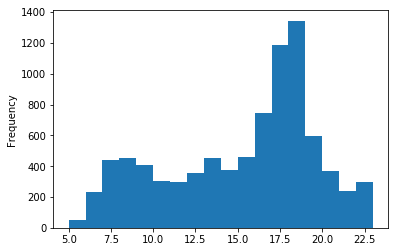

In [70]:
viagens_bicicletar[viagens_bicicletar['estacao_retirada']==70]['hora_retirada'].plot.hist(bins=18)

In [13]:
def num_of_rides_per_sex_type(ride_type):
    #ride_type = 0
    dataset = all_data[(all_data['sexo'] == 'M') & (all_data['tipo_viagem'] == ride_type)]
    dataset['dia_corrida'] = dataset.apply(lambda x: x['datetime_retirada'].date(), axis=1)
    rides_per_sex = pd.DataFrame(dataset['dia_corrida'].value_counts().sort_index())
    
    sex_rides = set(all_data['sexo'].unique()) - {'M'}
    
    for sex_type in sex_rides:
        print(sex_type)
        dataset = all_data[(all_data['sexo'] == sex_type) & (all_data['tipo_viagem'] == ride_type)]
        dataset['dia_corrida'] = dataset.apply(lambda x: x['datetime_retirada'].date(), axis=1)
        a = pd.DataFrame(dataset['dia_corrida'].value_counts())
        a = a.rename(columns={'dia_corrida': sex_type})
        rides_per_sex = pd.concat([rides_per_sex,a], axis=1)
    rides_per_sex = rides_per_sex.fillna(0)
    
    rides_per_sex['outros'] = rides_per_sex[list(sex_rides - {'F'})].sum(axis=1)

    rides_per_sex = rides_per_sex.rename(index=str, columns={'dia_corrida': 'M'})

    rides_per_sex = rides_per_sex.rename(index=str, columns={'M': 'M_%d' % ride_type,
                                                             'F': 'F_%d' % ride_type,
                                                             'outros': 'O_%d' % ride_type})

    rides_per_sex = rides_per_sex[['M_%d' % ride_type, 'F_%d' % ride_type, 'O_%d' % ride_type]]

    
#     rides_per_sex.to_csv('../data/bicicletar/graph_datasets/rides_per_sex.csv')
    return rides_per_sex

In [83]:
def num_of_rides_per_sex(ride_type):
    per_type_data = all_data[all_data['tipo_viagem'] == ride_type]
    per_type_data['dia_corrida'] = per_type_data.apply(lambda x: x['datetime_retirada'].date(), axis=1)

    per_sex_data = pd.DataFrame();

    for sex in ['M','F','O']:
        dataset = per_type_data[per_type_data['sexo'] == sex]
        a = pd.DataFrame(dataset['dia_corrida'].value_counts())
        a = a.rename(columns={'dia_corrida': '%s_%d' % (sex, ride_type)})
        per_sex_data = pd.concat([per_sex_data,a], axis=1)
    per_sex_data.index.name = 'dia'
    per_sex_data = per_sex_data.fillna(0)
    per_sex_data.to_csv('../data/bicicletar/graph_datasets/rides_per_sex_%s.csv' % ride_type)
    return per_sex_data

In [97]:
bb = pd.concat([num_of_rides_per_sex(ride_type) for ride_type in [0,3,4]], axis=1)
bb.index.name = 'dia'
bb = bb.fillna(0)
bb.to_csv('../data/bicicletar/graph_datasets/rides_per_sex.csv')

/home/omadson/.local/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/omadson/.local/lib/python3.5/site-packages/ipykernel_launcher.py:11: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  # This is added back by InteractiveShellApp.init_path()
/home/omadson/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will chan

In [62]:
def rides_between_neighborhood(ride_type, n=10):
    dataset = all_data
    rides_of_type = dataset[dataset['tipo_viagem'] == ride_type]
    st_nei = pd.read_csv('../data/bicicletar/stations_with_new_neighborhood.csv', index_col='id', usecols=['id', 'bairro'])
    rides_of_type['bairro_retirada'] = rides_of_type.apply(lambda x: st_nei.loc[x['estacao_retirada']]['bairro'], axis=1)
    rides_of_type['bairro_devolucao'] = rides_of_type.apply(lambda x: st_nei.loc[x['estacao_devolucao']]['bairro'], axis=1)
    rides_of_type['bairro_retirada'].value_counts().iloc[:10].index
    rides_of_type['bairro_devolucao'].value_counts().iloc[:10]
    topN_bairros = list(set(rides_of_type['bairro_retirada'].value_counts().iloc[:n].index).union(set(rides_of_type['bairro_devolucao'].value_counts().iloc[:n].index)))
    
    rides_topNbairros =   rides_of_type[rides_of_type['bairro_retirada'].isin(topN_bairros) & rides_of_type['bairro_devolucao'].isin(topN_bairros)]
    
    rides_topNbairros = rides_topNbairros[rides_topNbairros['bairro_devolucao'] != rides_topNbairros['bairro_retirada']]
    return rides_topNbairros[['bairro_devolucao','bairro_retirada']]

In [63]:
aa =  rides_between_neighborhood(0, 10)
(aa['bairro_devolucao'] + "," + aa['bairro_retirada']).value_counts().to_csv('../data/a.csv')

/home/omadson/.local/lib/python3.5/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/home/omadson/.local/lib/python3.5/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [40]:
#cria dataset com o número de cadastros (homem, mulher e outro) efetuados por ano (2014,2015,2016,2017)

def num_of_rides_per_month():
    # bicicletar rides 
    dataset = all_data[all_data['tipo_viagem'] == 0]
    dataset['ano_corrida'] = dataset.apply(lambda x: '%d' % x['datetime_retirada'].year, axis=1)
    dataset['mes_corrida'] = dataset.apply(lambda x: '%s' % str(x['datetime_retirada'].month).zfill(2), axis=1)
    
    dataset['aaa'] = dataset['ano_corrida'] + dataset['mes_corrida']
    
    return dataset       

In [3]:
all_data.columns


Index(['ano_nascimento', 'cidade', 'datetime_cadastro', 'datetime_devolucao',
       'datetime_retirada', 'estacao_devolucao', 'estacao_retirada',
       'id_bicicleta', 'id_usuario', 'pais', 'sexo', 'tipo_usuario',
       'tipo_viagem', 'uf'],
      dtype='object')

In [82]:
#cria dataset com viagens iniciais das estações por etapa

def first_ride_date_per_station():
    stations = pd.read_csv('../data/bicicletar/stations_with_new_neighborhood.csv')
    etapas = stations.groupby(by='etapa', as_index=True).agg({'id': pd.Series.nunique})    
    stations_dict = {}
    for i in stations['etapa'].unique():
        print('ETAPA ',i)
        stations_dict[i] = stations[stations['etapa']==i]['id'].values
#         tmp_dataset = all_data[all_data['estacao_retirada'].isin(stations_dict[i])]
        for s in stations_dict[i]:
#             tmp_dataset = all_data[all_data['estacao_retirada'] == s]['datetime_retirada'].unique().astype('datetime64')
#             dates = tmp_dataset[tmp_dataset['estacao_retirada'] == s]['datetime_retirada'].unique()
            tmp_dataset = all_data[all_data['estacao_retirada'] == s]
            tmp_dataset.sort_values(by=['datetime_retirada'],inplace=True)
            print('Estação: ',s,' | ',tmp_dataset[:1]['datetime_retirada'].values,' | ',tmp_dataset[-1:]['datetime_retirada'].values)

        
        

    
    
    
#     dataset_etapa = 
#     dataset['mes_corrida'] = dataset.apply(lambda x: '%s' % str(x['datetime_retirada'].month).zfill(2), axis=1)
#     all_data[all_data['estacao_retirada'] in stations_dict[1]]


    
    
    
first_ride_date_per_station()

ETAPA  1
Estação:  1  |  ['2014-12-16T06:58:04.743000000']  |  ['2017-12-31T17:44:29.000000000']
Estação:  2  |  ['2014-12-16T08:01:52.170000000']  |  ['2017-12-31T19:05:43.000000000']
Estação:  3  |  ['2014-12-16T10:07:07.853000000']  |  ['2017-12-31T18:14:08.000000000']
Estação:  4  |  ['2014-12-16T06:12:43.517000000']  |  ['2017-12-31T17:14:56.000000000']


/home/renan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Estação:  5  |  ['2014-12-16T11:36:26.653000000']  |  ['2017-12-31T21:31:01.000000000']
Estação:  6  |  ['2014-12-16T08:24:20.360000000']  |  ['2017-12-31T12:10:35.000000000']
Estação:  7  |  ['2014-12-16T08:09:36.727000000']  |  ['2017-12-31T18:27:34.000000000']
Estação:  8  |  ['2014-12-16T07:07:44.813000000']  |  ['2017-12-31T17:13:40.000000000']
Estação:  9  |  ['2014-12-16T14:01:41.420000000']  |  ['2017-12-31T10:15:42.000000000']
Estação:  10  |  ['2014-12-16T10:32:27.410000000']  |  ['2017-12-31T17:46:44.000000000']
Estação:  11  |  ['2014-12-16T08:19:10.427000000']  |  ['2017-12-31T20:07:39.000000000']
Estação:  12  |  ['2014-12-16T09:32:07.153000000']  |  ['2017-12-31T20:15:48.000000000']
Estação:  13  |  ['2014-12-16T07:41:03.793000000']  |  ['2017-12-31T19:53:30.000000000']
Estação:  14  |  ['2014-12-16T07:30:44.947000000']  |  ['2017-12-31T20:54:53.000000000']
Estação:  15  |  ['2014-12-16T06:58:32.983000000']  |  ['2017-12-31T21:01:02.000000000']
ETAPA  2
Estação:  16  |  

     id                     nome_estacao       lat        lon        programa  \
0     1               Praça Luíza Távora -3.732194 -38.510347      Bicicletar   
1     2                       José Vilar -3.734173 -38.504149      Bicicletar   
2     3               Shopping Del Paseo -3.736718 -38.496830      Bicicletar   
3     4                        BNB Clube -3.738607 -38.491576      Bicicletar   
4     5                    Frei Mansueto -3.735952 -38.488797      Bicicletar   
5     6                 Livraria Cultura -3.735155 -38.492531      Bicicletar   
6     7                   Praça Portugal -3.733616 -38.496978      Bicicletar   
7     8                   Joaquim Nabuco -3.732101 -38.500273      Bicicletar   
8     9                 Moreira da Rocha -3.726796 -38.506248      Bicicletar   
9    10                 Campo do América -3.730282 -38.502894      Bicicletar   
10   11                  Círculo Militar -3.730343 -38.496304      Bicicletar   
11   12                     

In [41]:
aa = num_of_rides_per_month()

/home/omadson/.local/lib/python3.5/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/omadson/.local/lib/python3.5/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/home/omadson/.local/lib/python3.5/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-d

In [65]:
final_data = pd.concat(aaa_sex,axis=1)
final_data['mes_ano'] = final_data.index
final_data['ano'] = final_data.apply(lambda x: str(x['mes_ano'])[:4], axis=1)
final_data['mes'] = final_data.apply(lambda x: str(x['mes_ano'])[4:], axis=1)
final_data = final_data[['ano','mes','M', 'F', 'O']]
final_data.to_csv('../data/bicicletar/graph_datasets/rides_per_month.csv', index=False)

/home/omadson/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [56]:
aaa_sex = list()
for sexo in aa.sexo.unique():
    aa_per_sex = aa[aa['sexo'] == sexo]
    aaa_sex.append(pd.DataFrame(aa_per_sex['aaa'].value_counts()).rename(columns={'aaa': sexo}))

In [90]:
def num_


all_data['data_cadastro'] = pd.to_datetime(all_data['data_cadastro'])

date15 = datetime.datetime(2015, 1, 1)
data2014 = all_data[all_data['data_cadastro'] < date15]

date16 = datetime.datetime(2016, 1, 1)
data2015 = all_data[(date15 <= all_data['data_cadastro']) & (all_data['data_cadastro'] < date16)]

date17 = datetime.datetime(2017, 1, 1)
data2016 = all_data[(date16 <= all_data['data_cadastro']) & (all_data['data_cadastro'] < date17)]
data2017 = all_data[date17 <= all_data['data_cadastro']]
data2014.shape[0],data2015.shape[0],data2016.shape[0],data2017.shape[0]


(307830, 1059103, 365981, 103229)

In [186]:
all_data.loc[0]['datetime_retirada'].date()

datetime.date(2014, 12, 16)

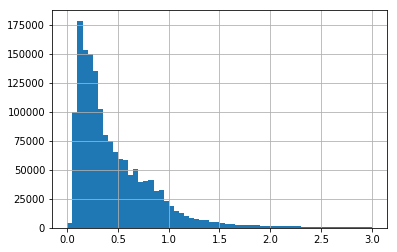

In [87]:
all_data['tempo_viagem'] = (all_data['datetime_devolucao'] - all_data['datetime_retirada']) / datetime.timedelta(hours=1)
data_bicicletar = all_data[all_data['tipo_viagem'] == 0]
data_bicicletar['tempo_viagem'][data_bicicletar['tempo_viagem'] <= 3].hist(bins=60)

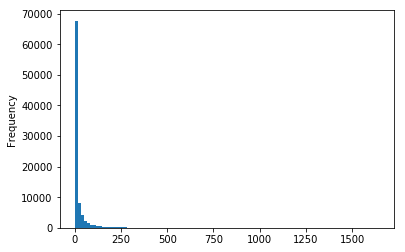

In [113]:
all_data['id_usuario'].value_counts().plot.hist(bins=100)

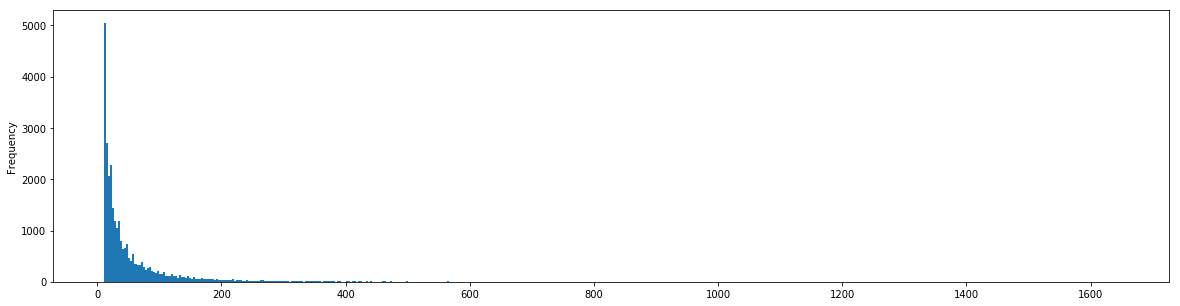

In [140]:
 all_data['id_usuario']

aa = all_data['id_usuario'].value_counts()
aa[aa > 10].plot.hist(bins=500, figsize=(20,5))

In [144]:
aa = pd.DataFrame(aa)

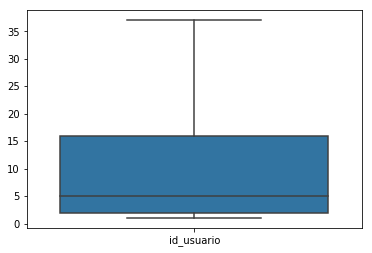

In [148]:
import seaborn as sns
sns.boxplot(data=aa,
                showfliers=False)

# aa.boxplot(figsize=(20,30))

In [151]:
all_data['data_cadastro'] = pd.to_datetime(all_data['data_cadastro'])

dataset = all_data
dataset['ano_cadastro'] = all_data.apply(lambda x: x['data_cadastro'].year, axis=1)
D2014 = dataset[dataset['ano_cadastro'] == 2008]

aa = D2014.groupby(by='sexo', as_index=True).agg({'id_usuario': pd.Series.nunique})

#dataset = dataset.rename(columns={'id_usuario': 'numero_de_cadastros'})
    
#dataset.to_csv('../data/bicicletar/graph_datasets/signup_per_year.csv')

In [175]:
summm = 0
for year in [2008,2009,2010,2011,2012,2013,2014,2015,2016,2017]:
    D2014 = dataset[dataset['ano_cadastro'] == year]
    aa = D2014.groupby(by='sexo', as_index=True).agg({'id_usuario': pd.Series.nunique})
    print(aa)
    print('Ano: %d; Total %d' %(year,sum(aa['id_usuario'])))
    summm +=sum(aa['id_usuario'])
    print()
    
    
print('TOTAL',summm)

      id_usuario
sexo            
F              1
M              1
Ano: 2008; Total 2

      id_usuario
sexo            
F              8
M             14
Ano: 2009; Total 22

      id_usuario
sexo            
F             15
M             20
Ano: 2010; Total 35

      id_usuario
sexo            
F             39
M             61
Ano: 2011; Total 100

      id_usuario
sexo            
F            284
M            457
Ano: 2012; Total 741

      id_usuario
sexo            
F            516
M            715
O              1
Ano: 2013; Total 1232

      id_usuario
sexo            
-              3
F           5113
M           6056
O             22
Ano: 2014; Total 11194

      id_usuario
sexo            
-              3
F          21825
M          21259
O             91
Ano: 2015; Total 43178

      id_usuario
sexo            
F           9873
M          10575
O            105
Ano: 2016; Total 20553

      id_usuario
sexo            
0              1
-              1
F           5416


In [163]:
3+5113+6056+22

11194

In [177]:
all_data['id_usuario'].unique().shape

(88433,)

In [16]:

#dataset = dataset.rename(columns={'id_usuario': 'numero_de_cadastros'})

In [30]:
finalDS

,M,F,O
ano_cadastro,,,
2008,1,1,0.0
2009,14,8,0.0
2010,20,15,0.0
2011,61,39,0.0
2012,457,284,0.0
2013,715,516,1.0
2014,6056,5113,25.0
2015,21259,21825,94.0
2016,10575,9873,105.0


In [12]:
dataset1 = aaa.groupby(by='ano_cadastro', as_index=True).agg({'id_usuario': pd.Series.nunique})

In [13]:
dataset1

,id_usuario
ano_cadastro,
2008,1
2009,14
2010,20
2011,61
2012,457
2013,715
2014,6056
2015,21259
2016,10575


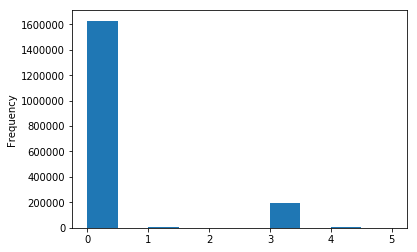

In [9]:
# all_data['tipo_viagem'].value_counts()
aa = all_data['tipo_viagem'].plot.hist()

In [136]:
def num_of_rides_per_birth_year(type):
    fData = all_data[(all_data['tipo_viagem'] == 0) & \
                     (all_data['ano_nascimento'] >= 1940) & \
                     (all_data['ano_nascimento'] <= 2000)] 
    
    m_data = fData[fData['sexo'] == 'M']['ano_nascimento'].value_counts()
    f_data = fData[fData['sexo'] == 'F']['ano_nascimento'].value_counts()
    o_data = fData[fData['sexo'] == 'O']['ano_nascimento'].value_counts()
    
    final_dataset = pd.concat([m_data,f_data,o_data], axis=1)    
    final_dataset.index.rename('year',inplace=True)
    final_dataset.fillna(0,inplace=True)
    
    final_dataset.columns = ['M','F','O']
    
    if (type == 'perc'):
        ((final_dataset/final_dataset.sum().sum())*100).to_csv('../data/bicicletar/graph_datasets/perc_num_of_rides_per_birth_year.csv')
    elif (type == 'abs'):
#         final_dataset.to_csv('../data/bicicletar/graph_datasets/num_of_users_birth_per_year.csv')        
        final_dataset.to_csv('../data/bicicletar/graph_datasets/num_of_rides_per_birth_year.csv')
    

In [137]:
num_of_rides_per_birth_year('perc')

In [123]:
import pandas as pd
aa = pd.read_csv("../data/bicicletar/stations_with_new_neighborhood.csv")

In [129]:
aa[aa['programa'] == 'Bicicletar']['bairro'].value_counts()

ALDEOTA                   11
CENTRO                    10
MEIRELES                   8
COCO                       6
FATIMA                     5
PAPICU                     4
DIONISIO TORRES            3
FARIAS BRITO               3
PATRIOLINO RIBEIRO         3
MONTE CASTELO              2
JOSE BONIFACIO             2
PARQUELANDIA               2
RODOLFO TEOFILO            2
JOAQUIM TAVORA             2
GENTILANDIA                2
BOM FUTURO                 2
PICI                       1
DAMAS                      1
MONTESE                    1
JACARECANGA                1
JARDIM AMERICA             1
SAO GERARDO                1
PRAIA DE IRACEMA           1
PRESIDENTE KENNEDY         1
ENG LUCIANO CAVALCANTE     1
AMADEU FURTADO             1
BENFICA                    1
São João do Tauape         1
PARREAO                    1
EDSON QUEIROZ              1
Name: bairro, dtype: int64